In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [2]:
df = pd.read_excel('../Apoyo-Desafio/Sales_Data.xlsx')

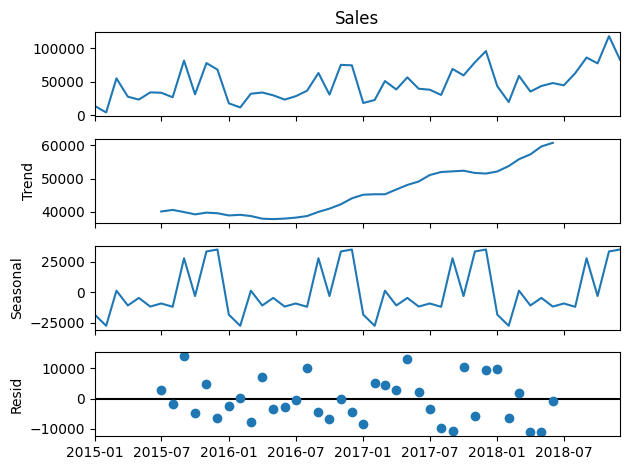

In [3]:
import matplotlib.pyplot as plt
# Asegurarse de que la columna 'Order Date' sea el índice del DataFrame
df.set_index('Order Date', inplace=True)
# Descomposición de la serie de tiempo
result = seasonal_decompose(df['Sales'], model='additive', period=12)
# Graficar los componentes
result.plot()
plt.show()

### Descomposición de la Serie de Tiempo

En esta sección, realizamos la descomposición de la serie de tiempo en sus tres componentes principales:
- **Tendencia:** Muestra la dirección general de los datos a lo largo del tiempo.
- **Estacionalidad:** Refleja patrones repetitivos en los datos en intervalos regulares.
- **Residuos:** Representan la parte aleatoria o no explicada de la serie.

Para ello, utilizamos la función `seasonal_decompose` de `statsmodels`, especificando un modelo aditivo (`model='additive'`) y un período de 12 meses (`period=12`). 



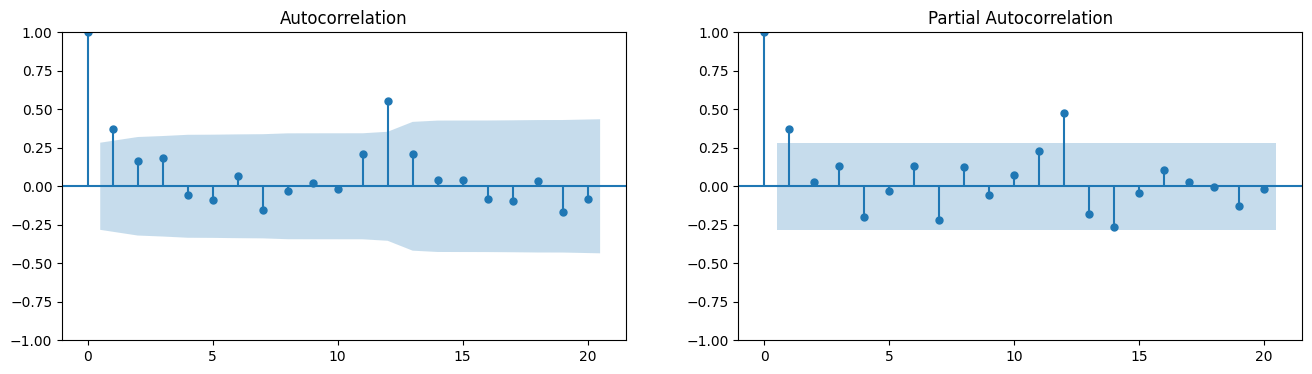

ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623
Critical Value (1%): -3.578
Critical Value (5%): -2.925
Critical Value (10%): -2.601


In [4]:

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Sales'], lags=20, ax=axes[0])
plot_pacf(df['Sales'], lags=20, ax=axes[1])
plt.show()

# Perform Dickey-Fuller test
result = adfuller(df['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

### Identificación de Parámetros para ARIMA

En esta sección, aplicamos técnicas estadísticas para determinar los valores óptimos de los parámetros **p**, **d** y **q** del modelo ARIMA:

1. **Test de Dickey-Fuller**: 
   - Este test nos permite evaluar si la serie de tiempo es estacionaria.
   - Si el **p-value** es menor a 0.05, podemos rechazar la hipótesis nula y concluir que la serie es estacionaria.
   - En este caso, el **ADF Statistic** es -4.41 y el **p-value** es 0.00027, lo que indica que la serie ya es estacionaria y no necesita diferenciación (d=0). Si no fuera estacionaria, aplicaríamos diferenciación (`d=1` o más).

2. **Funciones de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)**:
   - **ACF**: Nos ayuda a identificar el orden del componente de media móvil (**q**). 
   - **PACF**: Nos ayuda a identificar el orden del componente autorregresivo (**p**).
   - En los gráficos, observamos que:
     - El ACF muestra un corte brusco después del primer rezago, lo que sugiere **q=1**.
     - El PACF muestra un corte después del primer rezago, indicando **p=1**.


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Identificar los parámetros (p, d, q) adecuados
# En este ejemplo, usaremos (p=1, d=1, q=1) como punto de partida
p, d, q = 1, 1, 1

# Ajustar el modelo ARIMA a los datos históricos de ventas mensuales
model = ARIMA(df['Sales'], order=(p, d, q))
model_fit = model.fit()

# Realizar predicciones para los próximos 12 meses
forecast = model_fit.forecast(steps=12)

# Mostrar las predicciones
print(forecast)

2019-01-01    74121.351872
2019-02-01    71852.991823
2019-03-01    71275.436992
2019-04-01    71128.383802
2019-05-01    71090.942092
2019-06-01    71081.408931
2019-07-01    71078.981661
2019-08-01    71078.363645
2019-09-01    71078.206290
2019-10-01    71078.166225
2019-11-01    71078.156024
2019-12-01    71078.153427
Freq: MS, Name: predicted_mean, dtype: float64


d:\Data-Science\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Data-Science\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Data-Science\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Modelado con ARIMA y Predicción

En esta sección, implementamos el modelo **ARIMA(1,1,1)** utilizando la biblioteca `statsmodels`.

1. **Selección de parámetros**:
   - Basándonos en el análisis previo (Test de Dickey-Fuller, ACF y PACF), elegimos los valores:
     - **p = 1**: Un rezago significativo en la PACF sugiere un término autorregresivo de orden 1.
     - **d = 1**: Aplicamos una diferenciación para hacer la serie estacionaria.
     - **q = 1**: Un rezago en la ACF indica que un término de media móvil de orden 1 es adecuado.

2. **Entrenamiento del modelo**:
   - Ajustamos el modelo ARIMA con estos parámetros a los datos históricos de ventas mensuales.

3. **Predicción**:
   - Generamos predicciones para los próximos 12 meses.
   - La salida muestra los valores estimados de ventas para cada mes del período proyectado.


Mean Squared Error (MSE): 921723564.3376942
Mean Absolute Error (MAE): 22411.75335644607


d:\Data-Science\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Data-Science\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Data-Science\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


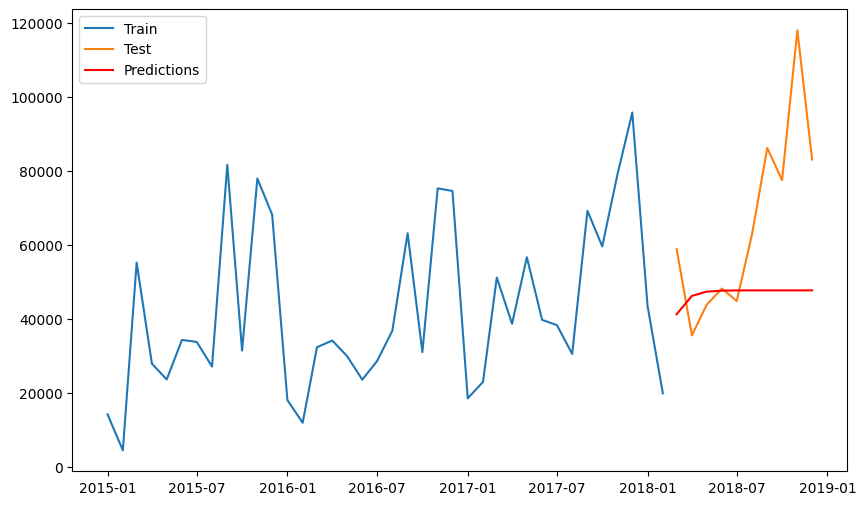

In [6]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ajustar el modelo ARIMA al conjunto de entrenamiento
model = ARIMA(train['Sales'], order=(p, d, q))
model_fit = model.fit()

# Realizar predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))

# Calcular métricas de evaluación
mse = mean_squared_error(test['Sales'], predictions)
mae = mean_absolute_error(test['Sales'], predictions)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

### Evaluación del Modelo y Visualización de Resultados

En esta sección, realizamos la evaluación del modelo ARIMA utilizando métricas de error y visualización de predicciones.

1. **División de Datos**:
   - Separamos el conjunto de datos en **entrenamiento (80%)** y **prueba (20%)** para evaluar el rendimiento del modelo en datos no vistos.

2. **Entrenamiento del Modelo**:
   - Se ajusta el modelo ARIMA a los datos de entrenamiento.

3. **Predicciones**:
   - Generamos predicciones sobre el conjunto de prueba.

4. **Cálculo de Métricas de Evaluación**:
   - **MSE (Error Cuadrático Medio):** 921723564.34 → Indica qué tan alejadas están las predicciones de los valores reales.
   - **MAE (Error Absoluto Medio):** 22411.75 → Representa el promedio de los errores en términos absolutos.

5. **Visualización de Resultados**:
   - Se grafica la serie de tiempo con tres elementos clave:
     - **Datos de entrenamiento (azul).**
     - **Datos de prueba (naranja).**
     - **Predicciones del modelo ARIMA (rojo).**

6. **Análisis de Resultados**:
   - Observamos que el modelo genera predicciones con una tendencia horizontal y no captura la variabilidad de los datos.
   - Esto podría indicar que los parámetros del modelo no son óptimos o que ARIMA no es el modelo más adecuado para esta serie.
   - Podríamos mejorar el modelo explorando otros valores de `p, d, q`, probando **auto_arima** o evaluando modelos alternativos como **SARIMA o Prophet**.
